In [1]:
#import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# loading the 'stolen_vehicle' data
stolen_vehicle=pd.read_csv('stolen_vehicles.csv')

In [3]:
# reading the first few lines of stolen_vehicle table
stolen_vehicle.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


In [4]:
# loading the 'location' data
location=pd.read_csv('locations.csv')

In [5]:
# reading the first few lines of location table
location.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [6]:
# loading the 'make' data
make=pd.read_csv('make_details.csv')

In [7]:
# reading the first few lines of location table
make.head()

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


# Assesing stolen_vehicle table

In [8]:
# checking for shape
stolen_vehicle.shape

(4553, 8)

In [9]:
# checking for duplicates
stolen_vehicle.duplicated().sum()

0

In [10]:
# checking colums name
stolen_vehicle.columns

Index(['vehicle_id', 'vehicle_type', 'make_id', 'model_year', 'vehicle_desc',
       'color', 'date_stolen', 'location_id'],
      dtype='object')

In [11]:
# value_counts on  vehicle_types
stolen_vehicle['vehicle_type'].value_counts()

Stationwagon               945
Saloon                     851
Hatchback                  644
Trailer                    582
Utility                    466
Roadbike                   297
Moped                      187
Light Van                  154
Boat Trailer               105
Trailer - Heavy             90
Caravan                     44
Other Truck                 42
Sports Car                  40
Flat Deck Truck             17
Mobile Home - Light         15
Convertible                 12
Cab and Chassis Only         8
Heavy Van                    7
Light Bus                    6
All Terrain Vehicle          5
Tractor                      4
Trail Bike                   2
Mobile Machine               2
Special Purpose Vehicle      1
Articulated Truck            1
Name: vehicle_type, dtype: int64

In [12]:
# value_counts on make-id
stolen_vehicle['make_id'].value_counts()

619.0    716
623.0    543
587.0    482
576.0    433
540.0    312
        ... 
515.0      1
552.0      1
501.0      1
628.0      1
520.0      1
Name: make_id, Length: 138, dtype: int64

In [13]:
# value_counts on model_year
stolen_vehicle['model_year'].value_counts()

2005.0    347
2006.0    333
2007.0    251
2004.0    238
2008.0    190
         ... 
1962.0      1
1943.0      1
1968.0      1
1940.0      1
1965.0      1
Name: model_year, Length: 63, dtype: int64

In [14]:
# value_counts on color
stolen_vehicle['color'].value_counts()

Silver    1272
White      934
Black      589
Blue       512
Red        390
Grey       378
Green      224
Gold        77
Brown       49
Yellow      39
Orange      35
Purple      26
Cream        9
Pink         4
Name: color, dtype: int64

In [15]:
# value_counts on location_id
stolen_vehicle['location_id'].value_counts()

102    1638
114     660
104     446
109     420
103     371
101     234
105     176
115     139
108     139
107     112
106     100
111      92
116      26
Name: location_id, dtype: int64

In [16]:
# checking for missing valus
stolen_vehicle.isnull().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
dtype: int64

In [17]:
# checking for data type
stolen_vehicle.dtypes

vehicle_id        int64
vehicle_type     object
make_id         float64
model_year      float64
vehicle_desc     object
color            object
date_stolen      object
location_id       int64
dtype: object

In [18]:
# change the  the datatype of date to datetime
stolen_vehicle['date'] = pd.to_datetime(stolen_vehicle['date_stolen'])

#### Extraction

In [19]:
# extract year from the data
stolen_vehicle['Year'] = stolen_vehicle['date'].dt.year

In [20]:
# extract months from the data
stolen_vehicle['Month'] = stolen_vehicle['date'].dt.month

In [21]:
# extract month name
stolen_vehicle['Month name'] = stolen_vehicle['date'].dt.month_name()

In [22]:
# extract day
stolen_vehicle['Day'] = stolen_vehicle['date'].dt.day

In [23]:
# extract weekday from the date
stolen_vehicle['day_of_week'] =stolen_vehicle['date'].dt.day_name()

In [24]:
# recheck the first few line of the table
stolen_vehicle.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,date,Year,Month,Month name,Day,day_of_week
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102,2021-11-05,2021,11,November,5,Friday
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105,2021-12-13,2021,12,December,13,Monday
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102,2022-02-13,2022,2,February,13,Sunday
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106,2021-11-13,2021,11,November,13,Saturday
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102,2022-01-10,2022,1,January,10,Monday


#  Assessing location table 

In [25]:
#  checking shape of the data
location.shape

(16, 5)

In [26]:
# checking duplicate value
location.duplicated().sum()

0

In [27]:
# checking for missing values
location.isnull().sum()

location_id    0
region         0
country        0
population     0
density        0
dtype: int64

In [28]:
# checking for data type
location.dtypes

location_id      int64
region          object
country         object
population      object
density        float64
dtype: object

In [29]:
location.columns

Index(['location_id', 'region', 'country', 'population', 'density'], dtype='object')

# Assessing make table

In [30]:
# checking for shape
make.shape

(138, 3)

In [31]:
# checking for duplicate value
make.duplicated().sum()

0

In [32]:
# checking for missing values
make.isna().sum()

make_id      0
make_name    0
make_type    0
dtype: int64

In [33]:
# checking for data type
make.dtypes

make_id       int64
make_name    object
make_type    object
dtype: object

In [34]:
# checking make column
make.columns

Index(['make_id', 'make_name', 'make_type'], dtype='object')

# Combining the dataset

In [35]:
# merging the file together
merge_data=stolen_vehicle.merge(location,  on='location_id',  how='left').merge(make, on='make_id', how='left')

In [36]:
# checking for missing value
merge_data.isnull().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
date             0
Year             0
Month            0
Month name       0
Day              0
day_of_week      0
region           0
country          0
population       0
density          0
make_name       15
make_type       15
dtype: int64

In [37]:
# dealing with missing value
merge_data['vehicle_type'].fillna("unknown", inplace=True)
merge_data['make_id'].fillna("unknown", inplace=True)
merge_data['model_year'].fillna("unknown", inplace=True)
merge_data['vehicle_desc'].fillna("no info", inplace=True)
merge_data['color'].fillna("no  info", inplace=True)
merge_data['make_name'].fillna("no info", inplace=True)
merge_data['make_type'].fillna("no info", inplace=True)

In [38]:
# recheck the columns for missing value
merge_data.isnull().sum()

vehicle_id      0
vehicle_type    0
make_id         0
model_year      0
vehicle_desc    0
color           0
date_stolen     0
location_id     0
date            0
Year            0
Month           0
Month name      0
Day             0
day_of_week     0
region          0
country         0
population      0
density         0
make_name       0
make_type       0
dtype: int64

In [39]:
# checking the data type
merge_data.dtypes

vehicle_id               int64
vehicle_type            object
make_id                 object
model_year              object
vehicle_desc            object
color                   object
date_stolen             object
location_id              int64
date            datetime64[ns]
Year                     int64
Month                    int64
Month name              object
Day                      int64
day_of_week             object
region                  object
country                 object
population              object
density                float64
make_name               object
make_type               object
dtype: object

In [40]:
# checking the shape
merge_data.shape

(4553, 20)

In [41]:
merge_data.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,date,Year,Month,Month name,Day,day_of_week,region,country,population,density,make_name,make_type
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102,2021-11-05,2021,11,November,5,Friday,Auckland,New Zealand,"1,695,200",343.09,Trailer,Standard
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105,2021-12-13,2021,12,December,13,Monday,Gisborne,New Zealand,"52,100",6.21,Trailer,Standard
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102,2022-02-13,2022,2,February,13,Sunday,Auckland,New Zealand,"1,695,200",343.09,Trailer,Standard
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106,2021-11-13,2021,11,November,13,Saturday,Hawke's Bay,New Zealand,"182,700",12.92,Trailer,Standard
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102,2022-01-10,2022,1,January,10,Monday,Auckland,New Zealand,"1,695,200",343.09,Trailer,Standard


In [42]:
# checking the country name
merge_data['country'].unique()

array(['New Zealand'], dtype=object)

In [43]:
# total population 
population=merge_data.groupby(['Year'], as_index=False).agg(total_population=('population', 'count'))
print(population)

   Year  total_population
0  2021              1668
1  2022              2885


In [44]:
# checking total number of region
merge_data['region'].nunique()

13

In [45]:
# checking region with with highest theft vehicle
region=merge_data.groupby(['region'], as_index=False).agg(
    total_vehicle=('vehicle_id', 'count')).sort_values(['total_vehicle'], ascending= [False])
print(region)

                region  total_vehicle
0             Auckland           1638
2           Canterbury            660
1        Bay of Plenty            446
12          Wellington            420
11             Waikato            371
7            Northland            234
3             Gisborne            176
5   Manawatū-Whanganui            139
8                Otago            139
10            Taranaki            112
4          Hawke's Bay            100
6               Nelson             92
9            Southland             26


<Axes: xlabel='total_vehicle', ylabel='region'>

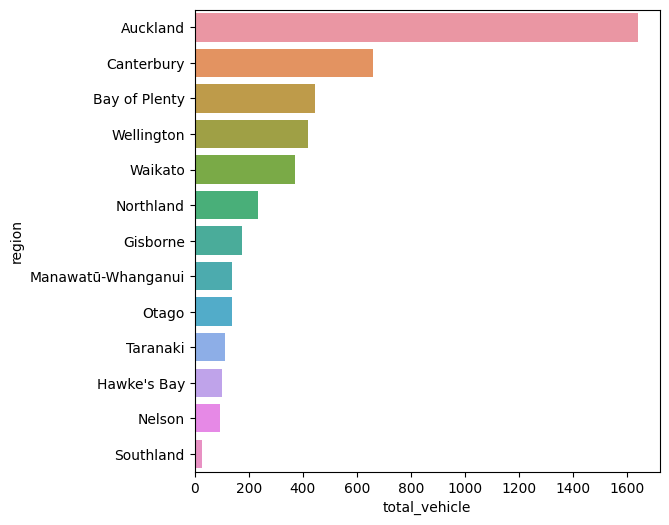

In [46]:
plt.figure(figsize=[6,6])
sns.barplot(data=region, x='total_vehicle', y='region')

###  Auckland is the region with highest theft vehicle

In [47]:
# relationship between region, population and total_vehicle theft
population=merge_data.groupby(['region', 'population'], as_index=False).agg(
    total_vehicle=('vehicle_id','count')).sort_values(['total_vehicle'], ascending=[False])
print(population)

                region population  total_vehicle
0             Auckland  1,695,200           1638
2           Canterbury    655,000            660
1        Bay of Plenty    347,700            446
12          Wellington    543,500            420
11             Waikato    513,800            371
7            Northland    201,500            234
3             Gisborne     52,100            176
5   Manawatū-Whanganui    258,200            139
8                Otago    246,000            139
10            Taranaki    127,300            112
4          Hawke's Bay    182,700            100
6               Nelson     54,500             92
9            Southland    102,400             26


<Axes: xlabel='total_vehicle', ylabel='population'>

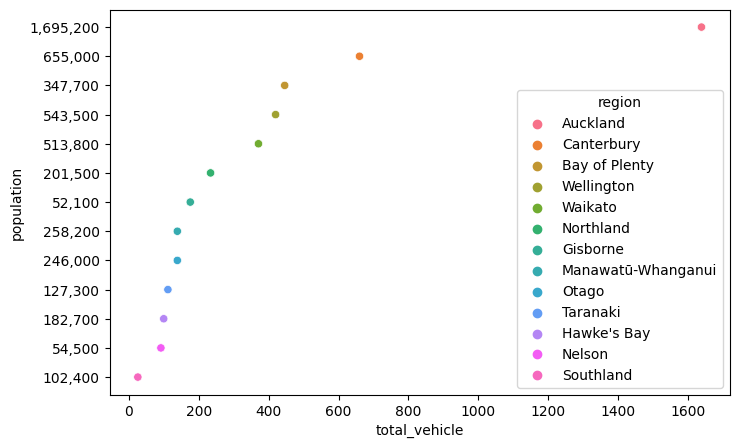

In [48]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=population, x='total_vehicle', y='population', hue='region')

#### The most populated region 'Auckland' have highest vehicle theft
 
Please sir which other better method to check for this

   Year  Month Month name  total_vehicle
0  2021     10    October            464
1  2021     11   November            560
2  2021     12   December            644
3  2022      1    January            740
4  2022      2   February            763
5  2022      3      March           1053
6  2022      4      April            329


<Axes: xlabel='Month name', ylabel='total_vehicle'>

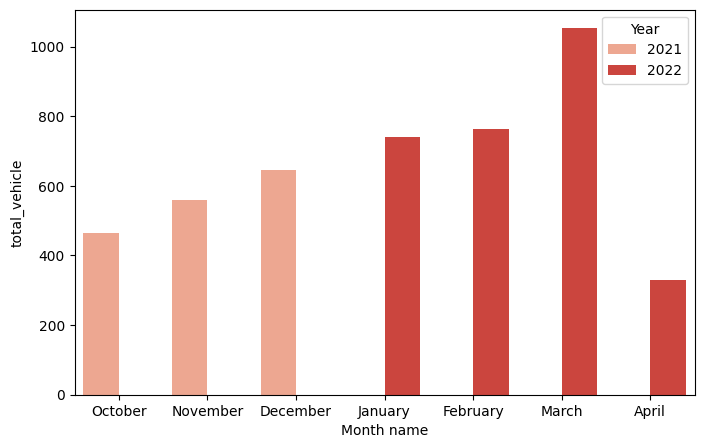

In [49]:
# checking month with highest vehicle theft
monthly_trend=merge_data.groupby(['Year','Month', 'Month name'],as_index=False).agg(
    total_vehicle=('vehicle_id','count')).sort_values(['Year','Month'],ascending=[True,True])
print(monthly_trend)

plt.figure(figsize=[8,5])
sns.barplot(data=monthly_trend, x='Month name', y='total_vehicle', hue='Year', palette='Reds')

#### There  is increase in vehicle theft every month  and march 2022 is the month with highest vehicle theft

  day_of_week  total_vehicle
1      Monday            767
5     Tuesday            711
0      Friday            655
6   Wednesday            629
4    Thursday            619
3      Sunday            595
2    Saturday            577


<Axes: xlabel='day_of_week', ylabel='total_vehicle'>

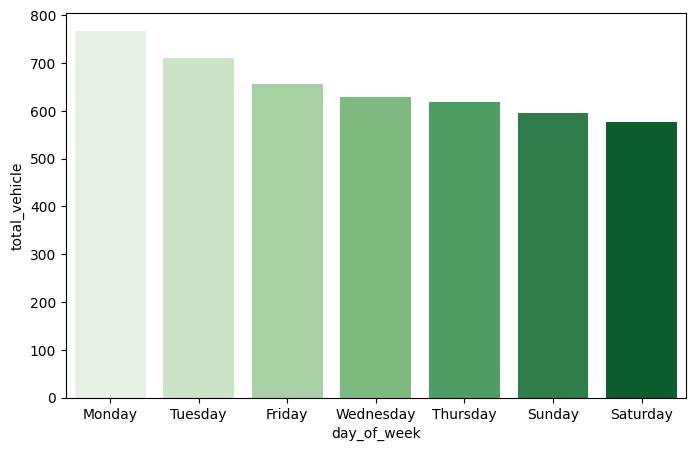

In [50]:
#  checking for day with highest  vehicle theft
daily_trend=merge_data.groupby(['day_of_week'], as_index=False).agg(
    total_vehicle=('vehicle_id','count')).sort_values(['total_vehicle'],ascending=[False])
print(daily_trend)

plt.figure(figsize=[8,5])
sns.barplot(data=daily_trend, x='day_of_week', y='total_vehicle',  palette='Greens')

#### Most vehicle are theft on Monday and Tuesday 

In [51]:
# checking the most theft vehicle name
make=merge_data.groupby(['make_name'], as_index=False).agg(
    total_vehicle=('vehicle_id','count')).sort_values(['total_vehicle'], ascending=[False])
make_index=make.loc[[118, 122, 86, 76,40]]
print(make_index)

    make_name  total_vehicle
118    Toyota            716
122   Trailer            543
86     Nissan            482
76      Mazda            433
40       Ford            312


<Axes: xlabel='make_name', ylabel='total_vehicle'>

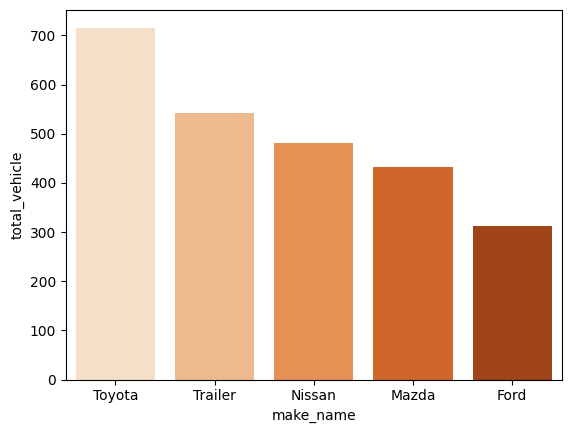

In [52]:
# graph of fist five most theft vehicle name
sns.barplot(data=make_index, x='make_name', y='total_vehicle',  palette='Oranges')

#### Toyota is the most theft vehicle name

In [53]:
# checking stolen vehicle_type
vehicle_type=merge_data.groupby(['vehicle_type'], as_index=False).agg(
    total_vehicle=('vehicle_id','count')).sort_values(['total_vehicle'], ascending=[False])
print(vehicle_type)

               vehicle_type  total_vehicle
19             Stationwagon            945
16                   Saloon            851
7                 Hatchback            644
22                  Trailer            582
24                  Utility            466
15                 Roadbike            297
13                    Moped            187
10                Light Van            154
2              Boat Trailer            105
23          Trailer - Heavy             90
4                   Caravan             44
14              Other Truck             42
18               Sports Car             40
25                  unknown             26
6           Flat Deck Truck             17
11      Mobile Home - Light             15
5               Convertible             12
3      Cab and Chassis Only              8
8                 Heavy Van              7
9                 Light Bus              6
0       All Terrain Vehicle              5
20                  Tractor              4
12         

<Axes: xlabel='vehicle_type', ylabel='total_vehicle'>

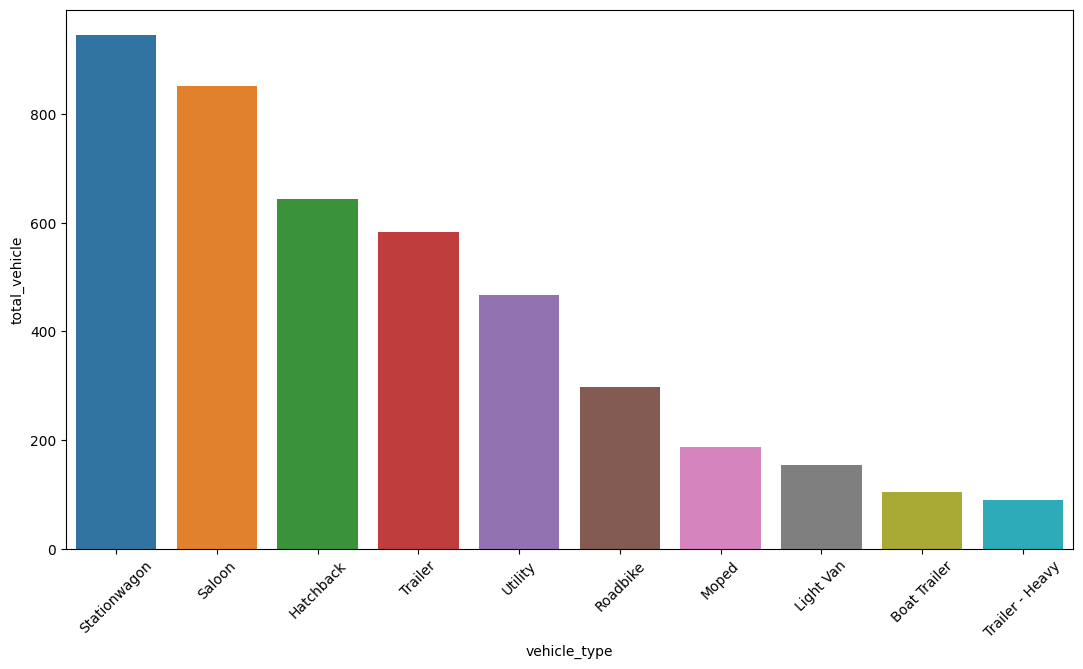

In [54]:
# selection of first ten most theft vehicle_type
vehicle_type_index=vehicle_type.loc[[19, 16, 7, 22,24,15,13,10,2,23]]

# graph of fist ten most theft vehicle_type
plt.figure(figsize=[13,7])
plt.xticks(rotation=45)
sns.barplot(data=vehicle_type_index, y='total_vehicle', x='vehicle_type')

#### Stationwagon is the most theft vehicle type

In [55]:
# total number of days
total_days=(merge_data['date'].max()-merge_data['date'].min()).days
print(total_days)

181


In [56]:
# total_vehicle theft in each region
vehicle_stolen=merge_data.groupby(['region'], as_index=False).agg(
    total_vehicle=('vehicle_id', 'count')).sort_values(['total_vehicle'], ascending=[False])
print(vehicle_stolen)

                region  total_vehicle
0             Auckland           1638
2           Canterbury            660
1        Bay of Plenty            446
12          Wellington            420
11             Waikato            371
7            Northland            234
3             Gisborne            176
5   Manawatū-Whanganui            139
8                Otago            139
10            Taranaki            112
4          Hawke's Bay            100
6               Nelson             92
9            Southland             26


In [57]:
# average number of vehicle_stolen per day in each region
vehicle_stolen["average_vehicle_stolen"]=round((vehicle_stolen['total_vehicle']) /(total_days))
print(vehicle_stolen)

                region  total_vehicle  average_vehicle_stolen
0             Auckland           1638                     9.0
2           Canterbury            660                     4.0
1        Bay of Plenty            446                     2.0
12          Wellington            420                     2.0
11             Waikato            371                     2.0
7            Northland            234                     1.0
3             Gisborne            176                     1.0
5   Manawatū-Whanganui            139                     1.0
8                Otago            139                     1.0
10            Taranaki            112                     1.0
4          Hawke's Bay            100                     1.0
6               Nelson             92                     1.0
9            Southland             26                     0.0


[Text(0.5, 1.0, 'Average_vehicle_stolen_per_day_in_each_region')]

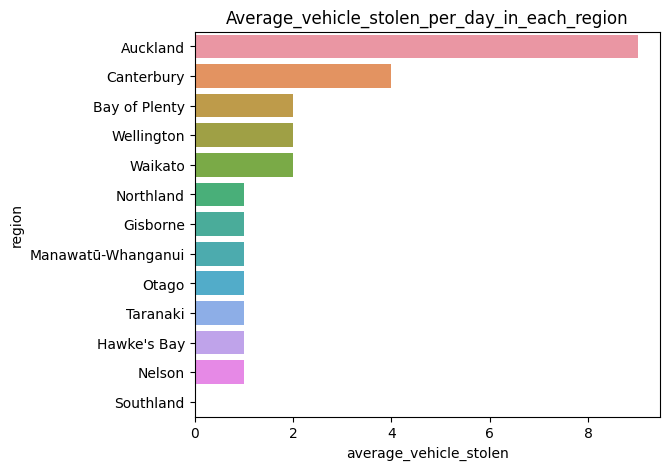

In [58]:
# graph for average_vehicle_stolen_per_day_in_each_region 
plt.figure(figsize=[6,5])
sns.barplot(data=vehicle_stolen, y='region', x='average_vehicle_stolen').set(
    title="Average_vehicle_stolen_per_day_in_each_region")

In [59]:
# total vehicle_stolen based on region and make_name
make_details=merge_data.groupby(['region', 'make_name'] , as_index=False).agg(
    total_vehicle=('vehicle_id', 'count')).sort_values(['total_vehicle'], ascending=False)

                 region make_name  total_vehicle
85             Auckland    Toyota            273
194          Canterbury    Toyota            136
141       Bay of Plenty    Toyota             72
478          Wellington    Toyota             54
432             Waikato    Toyota             44
318           Northland    Toyota             32
217            Gisborne    Toyota             27
350               Otago    Toyota             21
264  Manawatū-Whanganui    Toyota             18
288              Nelson    Toyota             16
241         Hawke's Bay    Toyota             13
392            Taranaki    Toyota              7
365           Southland    Toyota              3


[Text(0.5, 1.0, 'Total toyota theft in each region')]

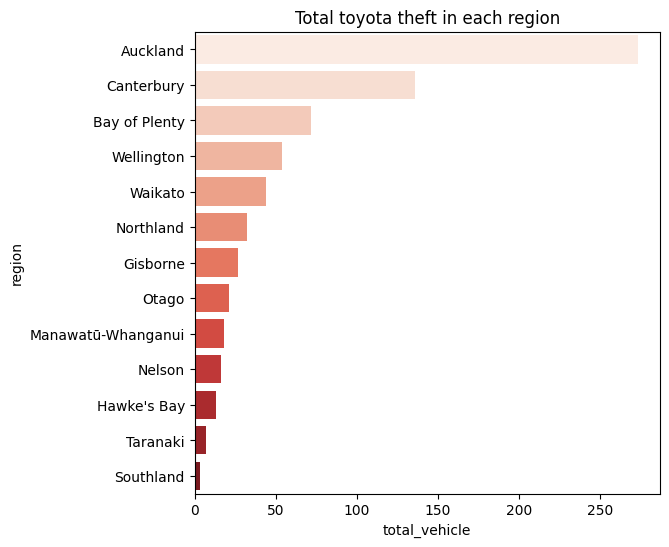

In [60]:
# selection of row with make_name"Toyota"
toyota_stolen=make_details[make_details['make_name'].isin(['Toyota'])]
print(toyota_stolen)

# plotting graph of region against total toyota theft
plt.figure(figsize=[6,6])
sns.barplot(data=toyota_stolen, y='region', x='total_vehicle', palette='Reds').set(
    title="Total toyota theft in each region")